In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

C:\Users\naumh\AppData\Local\Temp\ipykernel_12004\4181702328.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   x  y
0 -2 -1
1 -1 -1
2  1  1
3  2  1


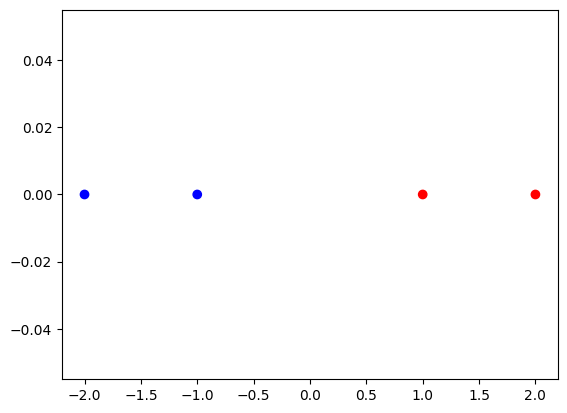

In [2]:
# Create a DataFrame with the points and their classes
data = {'x': [-2, -1, 1, 2],            #lineraly seperable
        'y': [-1, -1, 1, 1]}
df = pd.DataFrame(data)

print(df)
plt.scatter(df['x'], np.zeros_like(df['x']), c=df['y'], cmap='bwr', marker='o')

# Separate the features and the target
X = df[['x']].values
y = df['y'].values

In [3]:
# Train an SVC with a linear kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X, y)

# Print the coefficients and the intercept
print("Linear SVC coefficients:", svc_linear.coef_)
print("Linear SVC intercept:", svc_linear.intercept_)


Linear SVC coefficients: [[1.]]
Linear SVC intercept: [-0.]


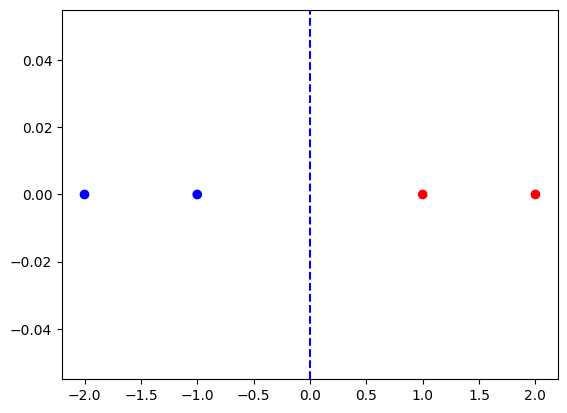

In [4]:
plt.scatter(df['x'], np.zeros_like(df['x']), c=df['y'], cmap='bwr', marker='o')

linear_boundary = -svc_linear.intercept_[0] / svc_linear.coef_[0][0]
plt.axvline(linear_boundary, color='b', linestyle='--')

   x  y
0 -2 -1
1 -1  1
2  1  1
3  2 -1


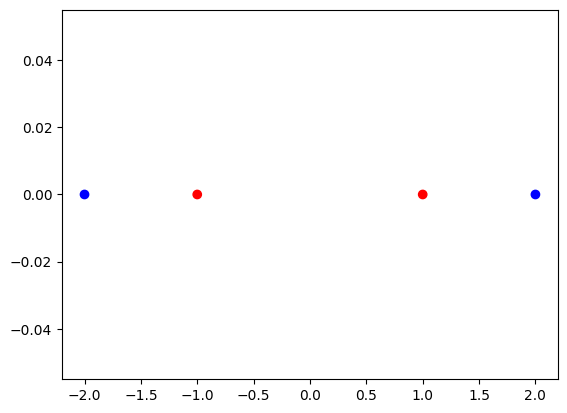

In [5]:
# Now let's have a non-separable dataset
data = {'x': [-2, -1, 1, 2],            #linearly non seperable
        'y': [-1, 1, 1, -1]}
df = pd.DataFrame(data)

print(df)
plt.scatter(df['x'], np.zeros_like(df['x']), c=df['y'], cmap='bwr', marker='o')

# Separate the features and the target
X = df[['x']].values
y = df['y'].values

[[-2.  4.]
 [-1.  1.]
 [ 1.  1.]
 [ 2.  4.]]


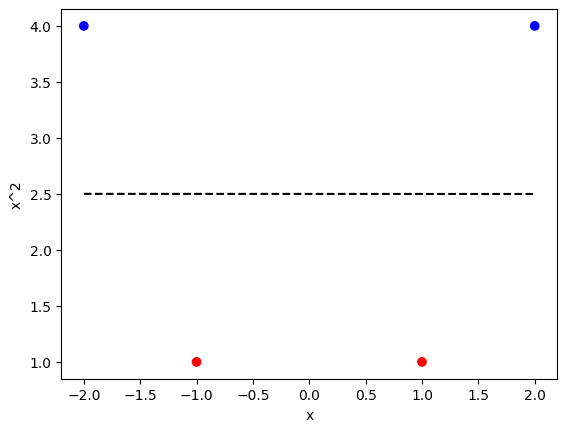

In [6]:
# Create a new dataset with polynomial features, use degree 2, PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False) #polynomial features of degree 2. no bias, x itself and x^2
X_poly = poly.fit_transform(X)

print(X_poly)

# Train a linear SVC with the new dataset
svc_poly = SVC(kernel='linear')
svc_poly.fit(X_poly, y)

# plot X_poly colored by class
plt.scatter(X_poly[:, 0], X_poly[:, 1], c=y, cmap='bwr', marker='o')

# Calculate two points for the decision boundary line
w = svc_poly.coef_[0]
b = svc_poly.intercept_[0]
x_points = np.array([X_poly[:, 0].min(), X_poly[:, 0].max()])
y_points = -(w[0] * x_points + b) / w[1]

# Plot the decision boundary
plt.plot(x_points, y_points, 'k--')

plt.xlabel('x')
plt.ylabel('x^2')
plt.show()

# Pefectly separates the points after adding the polynomial feature

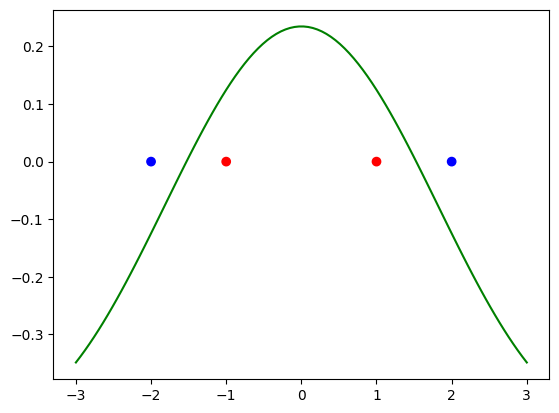

In [7]:
# Train an SVC with an RBF (Gaussian) kernel
svc_rbf = SVC(kernel='rbf', gamma=0.1)
svc_rbf.fit(X, y)

# Plot the original data
plt.scatter(df['x'], np.zeros_like(df['x']), c=df['y'], cmap='bwr', marker='o')

# Create a grid for plotting the decision function for the RBF SVC
x_grid = np.linspace(-3, 3, 100).reshape(-1, 1)
y_grid_rbf = svc_rbf.decision_function(x_grid) #if plug in points, we have value > 1 or value < -1 on other side
plt.plot(x_grid, y_grid_rbf, 'g-')

# Perfectly separates the points after applying the RBF kernel

#red points on one side, blue points on other. RBF seperated non-seperated to seperated points